In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras_preprocessing.image import load_img

In [3]:
path ='./clothing-dataset-small/train/t-shirt/'
file = '1cab0eb2-60f6-4d0a-a380-9a07b834d855.jpg'
fullName = f'{path}/{file}'

In [4]:
img = load_img(fullName, target_size=(299,299))

In [5]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x1FFCBC6B2E0>


In [6]:
x = np.array(img)
x.shape

(299, 299, 3)

In [7]:
from keras.applications.xception import Xception, preprocess_input, decode_predictions

In [8]:
model = Xception(weights='imagenet', input_shape=(299,299,3))

In [9]:
X = np.array([x])
X = preprocess_input(X)

In [10]:
pred = model.predict(X)
pred.shape

(1, 1000)

In [11]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.47058782),
  ('n04033995', 'quilt', 0.021494234),
  ('n04370456', 'sweatshirt', 0.016343094),
  ('n03188531', 'diaper', 0.016156502),
  ('n02730930', 'apron', 0.013485141)]]

### CNN - Transfer Learning

In [12]:
from keras_preprocessing.image import ImageDataGenerator

In [14]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory('./clothing-dataset-small/train/',
                                         target_size=(150,150),                              
                                         batch_size=32)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory('./clothing-dataset-small/validation/',
                                     target_size=(150,150),
                                     batch_size=32,
                                     shuffle=False
                                    )

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [15]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [16]:
X, y = next(train_ds)

In [17]:
y[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [18]:
base_model = tf.keras.applications.Xception(weights='imagenet',
                                            include_top=False,
                                            input_shape=(150, 150, 3))

base_model.trainable = False

inputs = keras.Input(shape=(150,150,3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [19]:
preds = model.predict(X)

In [20]:
preds.shape

(32, 10)

In [21]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [22]:
%%time
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 20s 181ms/step - loss: 1.4727 - accuracy: 0.6473 - val_loss: 1.1817 - val_accuracy: 0.7038
Epoch 2/10
96/96 [==============================] - 11s 110ms/step - loss: 0.5916 - accuracy: 0.8152 - val_loss: 0.7198 - val_accuracy: 0.7947
Epoch 3/10
96/96 [==============================] - 11s 110ms/step - loss: 0.3760 - accuracy: 0.8722 - val_loss: 0.9701 - val_accuracy: 0.7859
Epoch 4/10
96/96 [==============================] - 11s 112ms/step - loss: 0.2522 - accuracy: 0.9071 - val_loss: 0.8363 - val_accuracy: 0.7742
Epoch 5/10
96/96 [==============================] - 11s 112ms/step - loss: 0.1812 - accuracy: 0.9342 - val_loss: 0.8247 - val_accuracy: 0.8006
Epoch 6/10
96/96 [==============================] - 11s 111ms/step - loss: 0.1364 - accuracy: 0.9527 - val_loss: 1.0058 - val_accuracy: 0.7654
Epoch 7/10
96/96 [==============================] - 11s 110ms/step - loss: 0.1024 - accuracy: 0.9648 - val_loss: 0.8430 - val_accuracy: 0.8152

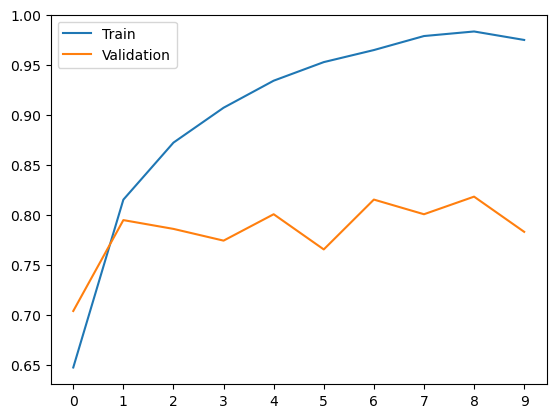

In [23]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xticks(np.arange(10))
plt.legend()
plt.show()

In [24]:
history.history

{'loss': [1.4727293252944946,
  0.5916388630867004,
  0.3760380744934082,
  0.2521759271621704,
  0.18117216229438782,
  0.13636550307273865,
  0.10237982124090195,
  0.07278401404619217,
  0.051685258746147156,
  0.0655718445777893],
 'accuracy': [0.6473272442817688,
  0.8151890635490417,
  0.8722294569015503,
  0.9071056246757507,
  0.9341590404510498,
  0.9527379274368286,
  0.9647979140281677,
  0.9788135886192322,
  0.9833768010139465,
  0.9749022126197815],
 'val_loss': [1.1817442178726196,
  0.7197871208190918,
  0.9700762033462524,
  0.8363122940063477,
  0.8246875405311584,
  1.0057605504989624,
  0.8429536819458008,
  0.8864317536354065,
  0.8241593241691589,
  0.955689549446106],
 'val_accuracy': [0.703812301158905,
  0.7947214245796204,
  0.7859237790107727,
  0.774193525314331,
  0.8005865216255188,
  0.7653958797454834,
  0.8152492642402649,
  0.8005865216255188,
  0.8181818127632141,
  0.7829912304878235]}

### Adjusting the learning rate

In [ ]:
def make_model(learning_rate = 0.01):
    
    base_model = tf.keras.applications.Xception(weights='imagenet',
                                            include_top=False,
                                            input_shape=(150, 150, 3))

    base_model.trainable = False

    #########################################################

    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [ ]:
%%time
scores = {}
lrs = [0.0001, 0.001, 0.01, 0.1]

for lr in lrs:
    print(lr)
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    print('\n\n')

In [ ]:
for lr , hist in scores.items():
    plt.plot(hist['val_accuracy'], label=lr)
    
plt.xticks(np.arange(10))    
plt.legend()

In [ ]:
model.save_weights('model_v1.h5', save_format='h5')

### Checkpointintg

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint('xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')

In [ ]:
lr = 0.01
print(lr)
model = make_model(learning_rate=lr)
history = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=checkpoint)

In [ ]:
def make_modelv2(learning_rate = 0.001, size_inner=100):
    
    base_model = tf.keras.applications.Xception(weights='imagenet',
                                            include_top=False,
                                            input_shape=(150, 150, 3))

    base_model.trainable = False

    #########################################################

    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)
    
    #########################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [ ]:
tf.debugging.set_log_device_placement(True)

scores = {}
lr = 0.001

#with tf.device('/GPU:0'):

for size in [16, 32]:
    print(size)
    model = make_modelv2(learning_rate=lr, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    print('\n\n')

In [ ]:
for size , hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))
    
plt.xticks(np.arange(10))    
_ = plt.legend()

In [ ]:
def make_modelv3(learning_rate = 0.001, size_inner=100, droprate=0.0):
    
    base_model = tf.keras.applications.Xception(weights='imagenet',
                                            include_top=False,
                                            input_shape=(150, 150, 3))

    base_model.trainable = False

    #########################################################

    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)
    
    #########################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [ ]:
scores = {}
lr = 0.001
size = 32

for droprate in [0.0, 0.2, 0.4]:
    print(droprate)
    model = make_modelv2(learning_rate=lr, size_inner=size)
    history = model.fit(train_ds, epochs=20, validation_data=val_ds)
    scores[droprate] = history.history
    print('\n\n')

In [ ]:
for droprate , hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('DropRate=%s' % droprate))
    
plt.xticks(np.arange(20))    
_ = plt.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

ax = plt.plot(scores[0.2]['val_accuracy'], label='Val')
ax = plt.plot(scores[0.2]['accuracy'], label='Train')
    
    
#fig.tight_layout()
plt.show()       


### Data Augmentation

In [ ]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                               shear_range=10,
                               zoom_range=0.1,
                               vertical_flip=True)

train_ds = train_gen.flow_from_directory('./clothing-dataset-small/train/',
                              target_size=(150,150),
                              batch_size=32)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory('./clothing-dataset-small/validation/',
                                     target_size=(150,150),
                                     batch_size=32,
                                     shuffle=False
                                    )

In [ ]:
lr = 0.001
size = 32
dr = 0.2

model = make_modelv3(learning_rate=lr, size_inner=size, droprate=dr)
history = model.fit(train_ds, epochs=30, validation_data=val_ds)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

ax = plt.plot(history.history['val_accuracy'], label='Val')
ax = plt.plot(history.history['accuracy'], label='Train')
    
plt.show()       


In [ ]:
history.history

In [ ]:
img2 = load_img('clothing-dataset-small/test/shoes/20209905-0830-4a6d-a1cf-7382051f8f18.jpg', target_size=(150,150))

x = np.array(img2)
X = np.array([x])
X.shape

X = preprocess_input(X)

pred = model.predict(X)

values = ['dress', 'hat', 'longsleeve',  'outwear', 'pants', 'shirt', 'shoes', 'shorts', 'skirt', 't-shirt']

list(zip(values, pred[0]))

In [ ]:
img2

#### Another way to do it - Practice

In [26]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [144]:
from keras.applications.xception import Xception, preprocess_input, decode_predictions
from keras.applications.inception_v3 import InceptionV3,preprocess_input

In [211]:
base_model = tf.keras.applications.Xception(weights='imagenet',
                                            include_top=False,
                                            input_shape=(300, 300, 3))

#base_model = InceptionV3(include_top=False,
#                         input_shape=(150, 150, 3),
#                        weights = 'imagenet')
#
base_model.trainable = False

In [212]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_34 (InputLayer)           [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_34[0][0]                   
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [188]:
from tensorflow.keras.optimizers import Adam

In [213]:
#train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                               #rotation_range=30,
                               #shear_range=0.2,
                               #zoom_range=0.2,
                               #horizontal_flip=True,
                               #width_shift_range=0.2,
                               #height_shift_range=0.2
#                              )
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                               
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True
                              )
#rescale=1/255.)

train_ds = train_gen.flow_from_directory('./clothing-dataset-small/train/',
                                         target_size=(300,300),                              
                                         batch_size=20)

#val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)#rescale=1/255.)

val_ds = val_gen.flow_from_directory('./clothing-dataset-small/validation/',
                                     target_size=(300,300),
                                     batch_size=20)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [214]:
inputs = keras.Input(shape=(300,300,3))
base = base_model(inputs, training=False)

#last_layer_out = base_model.get_layer('mixed7')
#last_layer_out = base_model.get_layer('add_70')
#base = last_layer_out.output
#x = layers.Flatten()(base_model.output)
vectors = keras.layers.GlobalAveragePooling2D()(base)

#x = layers.Dense(16, activation='relu')(x)
inner = keras.layers.Dense(128, activation='relu')(vectors)
drop = keras.layers.Dropout(0.2)(inner)
outputs = keras.layers.Dense(10)(drop)
#model = keras.Model(inputs, outputs)

from tensorflow.keras import Model

#modelx = Model(base_model.input, x)
modelx = Model(inputs, outputs)

optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss = keras.losses.CategoricalCrossentropy(from_logits=True)

modelx.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


In [191]:
history = modelx.fit(train_ds,
                     validation_data=val_ds,
                     steps_per_epoch=50,
                     epochs=20,
                     #validation_steps=5,
                     #verbose=2
                    )

Epoch 1/20
50/50 [==============================] - 26s 426ms/step - loss: 1.1189 - accuracy: 0.6184 - val_loss: 0.6289 - val_accuracy: 0.7537
Epoch 2/20
50/50 [==============================] - 20s 409ms/step - loss: 0.6004 - accuracy: 0.7885 - val_loss: 0.4896 - val_accuracy: 0.8240
Epoch 3/20
50/50 [==============================] - 20s 407ms/step - loss: 0.5029 - accuracy: 0.8280 - val_loss: 0.4518 - val_accuracy: 0.8358
Epoch 4/20
50/50 [==============================] - 21s 411ms/step - loss: 0.4330 - accuracy: 0.8462 - val_loss: 0.3846 - val_accuracy: 0.8710
Epoch 5/20
50/50 [==============================] - 20s 408ms/step - loss: 0.4359 - accuracy: 0.8543 - val_loss: 0.3990 - val_accuracy: 0.8592
Epoch 6/20
50/50 [==============================] - 21s 415ms/step - loss: 0.3796 - accuracy: 0.8720 - val_loss: 0.3909 - val_accuracy: 0.8680
Epoch 7/20
50/50 [==============================] - 21s 410ms/step - loss: 0.3374 - accuracy: 0.8890 - val_loss: 0.3716 - val_accuracy: 0.8622

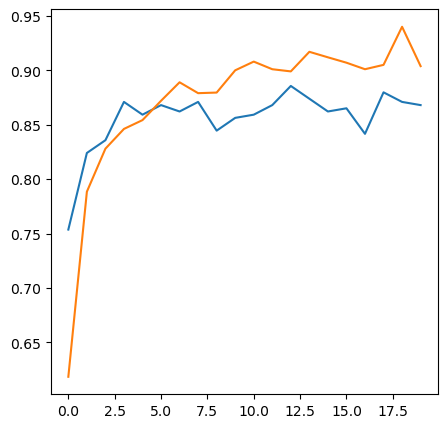

In [192]:
fig, ax = plt.subplots(figsize=(5, 5))

ax = plt.plot(history.history['val_accuracy'], label='Val')
ax = plt.plot(history.history['accuracy'], label='Train')
    
plt.show()    

In [208]:
img2 = load_img('clothing-dataset-small/test/shoes/20209905-0830-4a6d-a1cf-7382051f8f18.jpg', target_size=(300,300))

x = np.array(img2)
X = np.array([x])
X = preprocess_input(X)

pred = modelx.predict(X)

values = ['dress', 'hat', 'longsleeve',  'outwear', 'pants', 'shirt', 'shoes', 'shorts', 'skirt', 't-shirt']

list(zip(values, pred[0]))

[('dress', -0.18317273),
 ('hat', 0.30104828),
 ('longsleeve', -3.239931),
 ('outwear', -1.7980875),
 ('pants', -1.1986097),
 ('shirt', -4.8802567),
 ('shoes', 10.420599),
 ('shorts', -2.9437876),
 ('skirt', -1.6534709),
 ('t-shirt', -2.827328)]

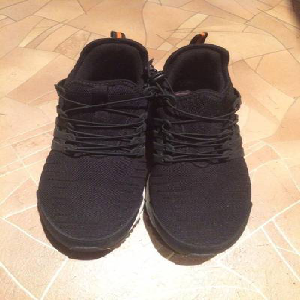

In [209]:
img2

In [206]:
img2 = load_img('clothing-dataset-small/test/shirt/4758e641-df13-4b3a-93a2-a9e232561c95.jpg', target_size=(300,300))

x = np.array(img2)
X = np.array([x])
X = preprocess_input(X)

pred = modelx.predict(X)

values = ['dress', 'hat', 'longsleeve',  'outwear', 'pants', 'shirt', 'shoes', 'shorts', 'skirt', 't-shirt']

list(zip(values, pred[0]))

[('dress', 1.3166647),
 ('hat', -2.3650184),
 ('longsleeve', 2.6793013),
 ('outwear', 0.2738761),
 ('pants', -4.197708),
 ('shirt', 3.334681),
 ('shoes', -5.3427444),
 ('shorts', -5.3501444),
 ('skirt', -3.4376712),
 ('t-shirt', 1.2652612)]

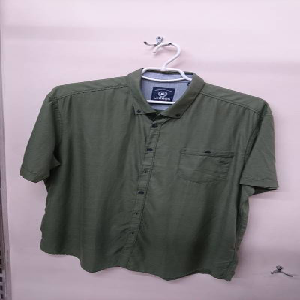

In [207]:
img2

In [204]:
img2 = load_img('clothing-dataset-small/test/hat/31ae3916-c352-45fe-9866-a8947fc74991.jpg', target_size=(300,300))

x = np.array(img2)
X = np.array([x])
X = preprocess_input(X)

pred = modelx.predict(X)

values = ['dress', 'hat', 'longsleeve',  'outwear', 'pants', 'shirt', 'shoes', 'shorts', 'skirt', 't-shirt']

list(zip(values, pred[0]))

[('dress', -0.52314717),
 ('hat', 10.023015),
 ('longsleeve', 0.15091927),
 ('outwear', 0.12681408),
 ('pants', -1.9404775),
 ('shirt', 0.02096685),
 ('shoes', -2.674353),
 ('shorts', -4.2344275),
 ('skirt', -0.67961067),
 ('t-shirt', -4.232433)]

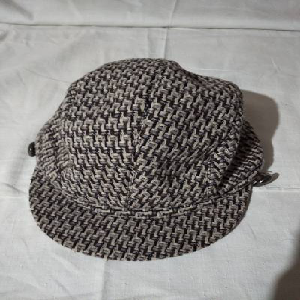

In [205]:
img2